In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns

In [4]:
# loading the dataset
df = pd.read_csv('Data-Science-Job_Listing.csv')
# viewing the dataset
df

,Position,Job Title,Company Name,Location,Salary,Date,Logo,Job Link,Company Rating
0,1,Associate Stop Loss Underwriter,The Insurance Center\n2.7,"Onalaska, WI",$57K - $84K (Glassdoor est.),30d+,https://media.glassdoor.com/sql/453835/the-ins...,https://www.glassdoor.com/partner/jobListing.h...,2.7
1,2,Manager of Data Science,"Nuvative, Inc.\n3.4","Wichita, KS",$106K - $157K (Glassdoor est.),30d+,https://media.glassdoor.com/sql/1384674/net-pa...,https://www.glassdoor.com/partner/jobListing.h...,3.4
2,3,Senior Data Product Manager,ProviderTrust\n4.2,"Nashville, TN",$105K - $141K (Glassdoor est.),11d,https://media.glassdoor.com/sql/1953857/hibob-...,https://www.glassdoor.com/partner/jobListing.h...,4.2
3,4,Oncology Nurse Navigator,Inizio Engage\n3.6,"Portland, OR",$90K - $113K (Employer est.),1d,https://media.glassdoor.com/sql/8794153/inizio...,https://www.glassdoor.com/partner/jobListing.h...,3.6
4,5,Head of Artificial Intelligence – Americas Region,Covestro\n3.6,"Pittsburgh, PA",$89K - $148K (Glassdoor est.),30d+,https://media.glassdoor.com/sql/27128/covestro...,https://www.glassdoor.com/partner/jobListing.h...,3.6
...,...,...,...,...,...,...,...,...,...
495,496,Cloud Administrator,GM Financial\n4.0,"Arlington, TX",NaN,25d,https://media.glassdoor.com/sql/488523/gm-fina...,https://www.glassdoor.com/partner/jobListing.h...,4.0
496,497,Robotics Engineer (AI),Alpha Net Consulting,United States,$44.12 - $70.00 Per Hour (Employer est.),4d,NaN,https://www.glassdoor.com/partner/jobListing.h...,NaN
497,498,Tchr of English- Newark School of Data Science...,Newark Board of Education\n3.3,"Newark, NJ",$62K - $107K (Employer est.),30d+,https://media.glassdoor.com/sql/137673/newark-...,https://www.glassdoor.com/partner/jobListing.h...,3.3
498,499,Statistician,Sciome LLC,"Research Triangle Park, NC",$33.00 - $39.00 Per Hour (Employer est.),30d+,https://media.glassdoor.com/sql/2418223/sciome...,https://www.glassdoor.com/partner/jobListing.h...,NaN


In [8]:
df.columns

Index(['Position', 'Job Title', 'Company Name', 'Location', 'Salary', 'Date',
       'Logo', 'Job Link', 'Company Rating'],
      dtype='object')

### DATA CLEANING

In [6]:
df.shape

(500, 9)

In [7]:
#let's check for missing data
df.isnull().sum()

Position           0
Job Title          0
Company Name       0
Location           0
Salary            62
Date               0
Logo              64
Job Link           0
Company Rating    61
dtype: int64

In [10]:
#first the logo isn't important so we will just fill it up
df['Logo'] = df['Logo'].fillna(df['Logo'].mode()[0])

In [11]:
#We can drop rows without company rating and salary since they are beneficial
df = df.dropna(subset=['Company Rating', 'Salary'])
df

,Position,Job Title,Company Name,Location,Salary,Date,Logo,Job Link,Company Rating
0,1,Associate Stop Loss Underwriter,The Insurance Center\n2.7,"Onalaska, WI",$57K - $84K (Glassdoor est.),30d+,https://media.glassdoor.com/sql/453835/the-ins...,https://www.glassdoor.com/partner/jobListing.h...,2.7
1,2,Manager of Data Science,"Nuvative, Inc.\n3.4","Wichita, KS",$106K - $157K (Glassdoor est.),30d+,https://media.glassdoor.com/sql/1384674/net-pa...,https://www.glassdoor.com/partner/jobListing.h...,3.4
2,3,Senior Data Product Manager,ProviderTrust\n4.2,"Nashville, TN",$105K - $141K (Glassdoor est.),11d,https://media.glassdoor.com/sql/1953857/hibob-...,https://www.glassdoor.com/partner/jobListing.h...,4.2
3,4,Oncology Nurse Navigator,Inizio Engage\n3.6,"Portland, OR",$90K - $113K (Employer est.),1d,https://media.glassdoor.com/sql/8794153/inizio...,https://www.glassdoor.com/partner/jobListing.h...,3.6
4,5,Head of Artificial Intelligence – Americas Region,Covestro\n3.6,"Pittsburgh, PA",$89K - $148K (Glassdoor est.),30d+,https://media.glassdoor.com/sql/27128/covestro...,https://www.glassdoor.com/partner/jobListing.h...,3.6
...,...,...,...,...,...,...,...,...,...
490,491,Data Engineer,Inspur USA Inc.\n3.6,"Seattle, WA",$30.00 - $50.00 Per Hour (Employer est.),24h,https://media.glassdoor.com/sql/420877/inspur-...,https://www.glassdoor.com/partner/jobListing.h...,3.6
491,492,"Manager, Data Science Platform Engineering",Dave Inc.\n4.0,Remote,$169K - $271K (Employer est.),30d+,https://media.glassdoor.com/sql/1847431/dave-s...,https://www.glassdoor.com/partner/jobListing.h...,4.0
494,495,Analytics Solution Owner,Network Coverage\n4.4,Remote,$75K - $125K (Employer est.),30d+,https://media.glassdoor.com/sql/1839638/networ...,https://www.glassdoor.com/partner/jobListing.h...,4.4
497,498,Tchr of English- Newark School of Data Science...,Newark Board of Education\n3.3,"Newark, NJ",$62K - $107K (Employer est.),30d+,https://media.glassdoor.com/sql/137673/newark-...,https://www.glassdoor.com/partner/jobListing.h...,3.3


In [ ]:
"""
We now have a clean dta to work with.
"""

### Exploratory


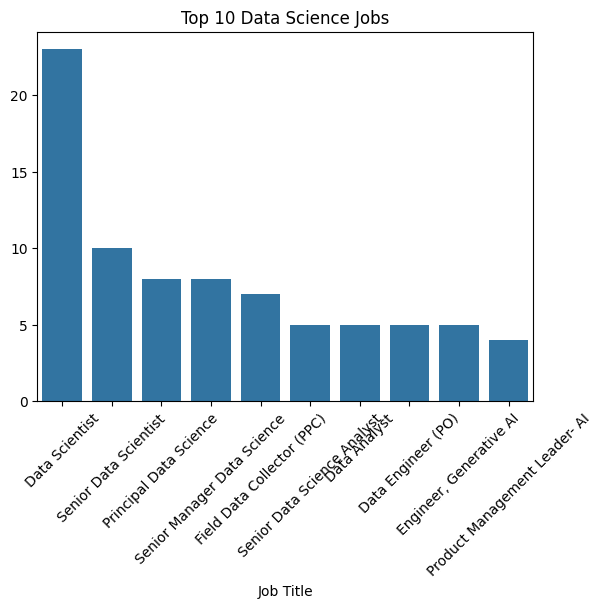

In [21]:
#let's look at the top ten data science jobs
top_ten_jobs = df['Job Title'].value_counts().head(10)

#lets plot them
sns.barplot(x=top_ten_jobs.index, y=top_ten_jobs.values)
plt.xticks(rotation=45)
plt.title('Top 10 Data Science Jobs')
plt.show()



#

In [22]:
df.describe()

,Position,Company Rating
count,392.000000,392.000000
mean,261.387755,3.811480
std,139.080439,0.483377
min,1.000000,1.000000
25%,144.750000,3.600000
50%,265.000000,3.850000
75%,379.250000,4.000000
max,500.000000,5.000000


/tmp/ipykernel_13569/2397983937.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Company Rating'])


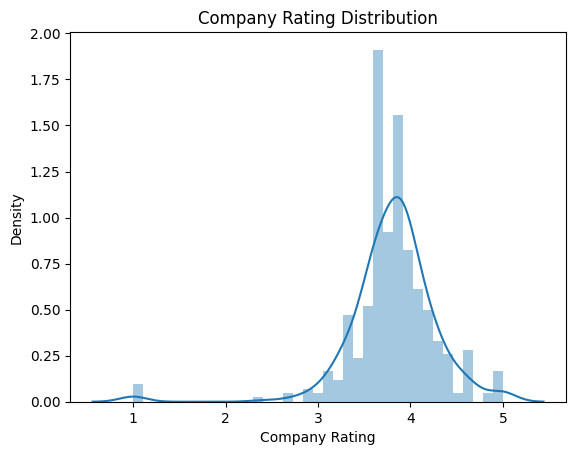

In [25]:
#let's check the distribution of company ratings
sns.displot(df['Company Rating'])
plt.title('Company Rating Distribution')
plt.show()

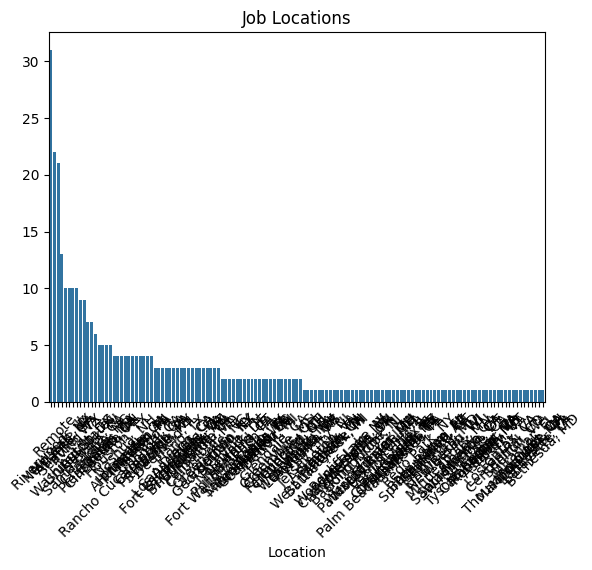

In [24]:
#we can also check the distribution of job locations
location_counts = df['Location'].value_counts()

#plotting the distribution
sns.barplot(x=location_counts.index, y=location_counts.values)
plt.xticks(rotation=45)
plt.title('Job Locations')
plt.show()